# Radial Basis Function Network
This notebook demonstrates the effectiveness of RBFN for classification of non-linearly seperable data set. 

# Import Packages

In [19]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generating The Data

Generate a non-linearly seperable data set to test our RBFN with.

In [20]:
from scipy.sparse import data
r = np.arange(0,21, dtype="float")

x1_vals = -2 + 0.2*r
x2_vals = x1_vals

points = np.array([-2,-2])
for x1 in x1_vals:
  for x2 in x2_vals:
    if not(x1 == -2 and x2 == -2):
      points = np.vstack((points,np.array([x1,x2])))
points.shape

(441, 2)

In [21]:
labels = np.array([], dtype='float')
x_axis, y_axis, color = [], [], []
for p in points:
  x_axis.append(p[0])
  y_axis.append(p[1])
  if p[0]**2 + p[1]**2 <= 1:
    labels = np.append(labels,1)
    color.append(1)
  else:
    labels = np.append(labels,-1)
    color.append(-1)
labels.shape

(441,)

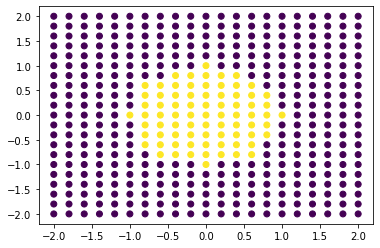

In [22]:
plt.scatter(x_axis, y_axis, c=color)

### Split Data into train and test sets

In [23]:
x_train, x_test, y_train, y_test = train_test_split(points, labels, test_size=0.1, random_state=40)

# Part 1
### Defining some functions

In [24]:
# Gaussian Kernel Function
def kernel(input, center, spread):
  return np.exp((-np.linalg.norm(input-center)**2)/(2*(spread)**2))

# Modified Signum Function
def signum(x):
  if x < 0:
    return -1
  else:
    return 1

# Accuracy Function
def accuracy(output, target):
  return np.sum(output == target)/len(output)

# Mean Squared Error Function
def MSE(output, target):
  return np.sum(np.power(output.T - target.T, 2)) / len(output)

### Function for Computing the G Matrix

Takes a 2D list of all the inputs, a 1D list of RBF unit centers, and single value for the spread. Returns an 2D list of the RBF unit outputs which we call the G matrix.

In [25]:
# Calculates G Matrix
def calc_G(inputs, centers, spread):
  G = []
  for input in inputs:
    row = []
    for center in centers:
      row.append(kernel(input,center,spread))
    G.append(row)
  return np.array(G).T


### Function for Computing W

Function that computes the optimal weights matrix (closed form solution)

In [26]:
# Compute Weights
def calc_Weights(G, labels):
  return np.dot(np.dot(np.linalg.pinv(np.dot(G,G.T)), G), labels.T)

### Function for Prediction

Function to take G matrix and Weights matrix and return the RBFN output (single output for classification task)

In [27]:
# Predict Function
def predict(G, W):
  return np.array(list(map(signum, np.dot(W.T,G))))

###  Tuning of Spread Hyperparameter

Find the optimal spread value. For this example we assume x_train will be the RBF centers.

In [28]:
# Spread Values
spreads = [0.1, 0.25, 0.1, 0.5, 1, 1.5, 2, 3, 4, 5, 7, 10, 15, 20, 25, 30, 40, 50]
errors_train = []
errors_test = []

centers = x_train

for spread in spreads:
  G1 = calc_G(x_train, centers, spread)
  W = calc_Weights(G1, y_train)
  y1 = predict(G1,W)
  error_train = MSE(y1, y_train)
  G2 = calc_G(x_test, centers, spread)
  y2 = predict(G2,W)
  error_test = MSE(y2, y_test)
  errors_train.append(error_train)
  errors_test.append(error_test)

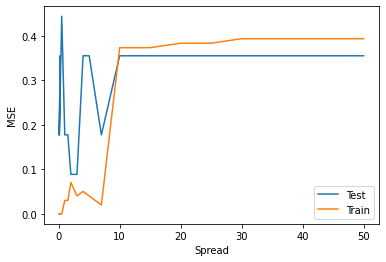

In [29]:
# Plot the MSE vs Spread
plt.plot(spreads, errors_test, label='Test')
plt.plot(spreads, errors_train, label='Train')
plt.xlabel("Spread")
plt.ylabel("MSE")
plt.legend()  
plt.show()

### Training with Optimal Spread

Optimal spread value appears to be 1.5 according to the plot above. Store the optimal weights in `W`.

In [30]:
# Declare Hyperparameters
spread = 1.5
centers = x_train

# Train network and store weights in W
G1 = calc_G(x_train, centers, spread)
W = calc_Weights(G1, y_train)
y1 = predict(G1,W)

### Results

Now visualize our results to demonstrate the effectiveness of the RBFN

In [31]:
# Format Axis
x_axis = []
y_axis = []
for x in x_test:
  x_axis.append(x[0])
  y_axis.append(x[1])

# Contour for Decision Boundary
xx, yy = np.meshgrid(np.arange(-2.2, 2.2, 0.075), np.arange(-2.2, 2.2, 0.075))
cdf = pd.DataFrame({'x': xx.reshape(-1), 'y': yy.reshape(-1)})
G_contour = calc_G(cdf.values, centers, spread)
y_contour = predict(G_contour,W)


(-2.2, 2.2)

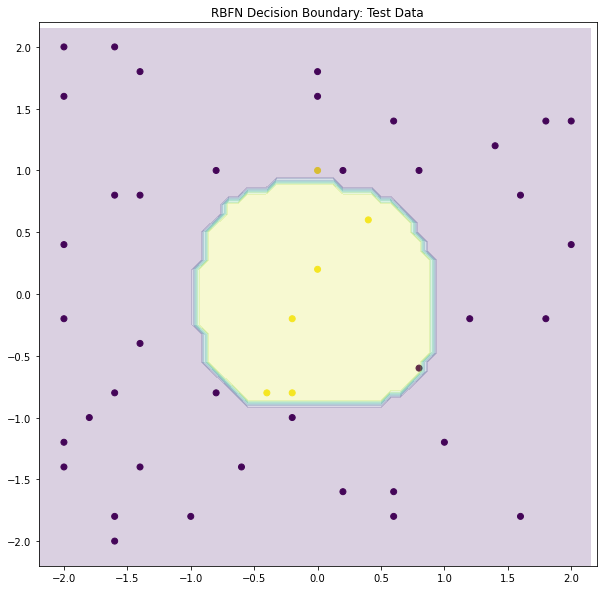

In [32]:
# Plot Resulting Decision Boundary (with test data)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
plt.scatter(x_axis, y_axis, c=y_test)
plt.contourf(xx, yy, y_contour.reshape(xx.shape), alpha=0.2)
plt.title("RBFN Decision Boundary: Test Data")
ax = plt.gca()
ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-2.2, 2.2)


In [33]:

# Compute Predicted Values
G_test = calc_G(x_test, centers, spread)
y_pred = predict(G_test, W)

# Compute Accuracy
correct = 0

for i in range(y_test.size):
  if y_test[i] == y_pred[i]:
    correct += 1
accuracy = correct / len(y_test)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9555555555555556
